# Concise Implementation of Linear Regression

We will show you how to implement
the linear regression model
concisely by using high-level APIs

In [1]:
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

Use a framework's predefined layers

In [3]:
class LinearRegression(d2l.Module):  
    def __init__(self, num_inputs, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Linear(num_inputs, 1)

@d2l.add_to_class(LinearRegression)  
def forward(self, X):
    """The linear regression model."""
    return self.net(X)

The `MSELoss` class computes the mean squared error

In [4]:
@d2l.add_to_class(LinearRegression)  
def loss(self, y_hat, y):
    fn = nn.MSELoss()
    return fn(y_hat, y)

Instantiate an `SGD` instance

In [5]:
@d2l.add_to_class(LinearRegression)  
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), self.lr)

The training loop itself is the same
to the one we obtained by implementing everything from scratch

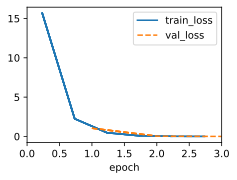

In [6]:
model = LinearRegression(2, lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

Compare the model parameters learned by training on finite data
and the actual parameters

In [7]:
@d2l.add_to_class(LinearRegression)  
def get_w_b(self):
    return (self.net.weight.data, self.net.bias.data)
w, b = model.get_w_b()
print(f'error in estimating w: {data.w - w.reshape(data.w.shape)}')
print(f'error in estimating b: {data.b - b}')

error in estimating w: tensor([ 0.0177, -0.0207])
error in estimating b: tensor([0.0196])
